# Datahåndering III: Statistikk

```{admonition} Læringsutbytte
Etter å ha arbeidet med dette temaet, skal du kunne:
1. bruke deskriptiv statistikk til å beskrive data med tall og visualiseringer
2. utføre regresjonsanalyse og tolke resultatene
```

```{epigraph}
If your experiment needs a statistician, you need a better experiment.

-- Fysikeren Ernest Rutherford (1871–1937)
```

## Deskriptiv statistikk
Vi kan bruke statistikk til å oppsummere, beskrive og tolke data. Vi skiller mellom to typer statistikk:
1. Deskriptiv statistikk: oppsummere og beskrive data
2. Statistisk interferens: trekke slutninger fra data

Vi skal mest se på deskriptiv statistikk her. La oss vende tilbake til pingvindataene våre. Vi kan få en enkel statistisk oversikt over datasettet vårt ved å bruke funksjonen _describe_.

In [28]:
import pandas as pd

pingvindata = pd.read_csv("data/penguins.txt", delimiter = ",")
pingvindata.describe()

bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
count      342.000000     342.000000         342.000000   342.000000
mean        43.921930      17.151170         200.915205  4201.754386
std          5.459584       1.974793          14.061714   801.954536
min         32.100000      13.100000         172.000000  2700.000000
25%         39.225000      15.600000         190.000000  3550.000000
50%         44.450000      17.300000         197.000000  4050.000000
75%         48.500000      18.700000         213.000000  4750.000000
max         59.600000      21.500000         231.000000  6300.000000

Vi kan forklare disse størrelsene slik:
- count = antall registrerte tilfeller
- mean = gjennomsnittet for alle individer
- std = standardavviket (dette skal vi se nærmere på seinere)
- min = minste registrerte verdi
- 25 % = "nedre kvartil". Her har 25 % av pingvinene for eksempel en kroppsmasse mellom 3550 og minste verdi (2700).
- 50 % = "midtre kvartil". Her har 50 % av pingvinene for eksempel en kroppsmasse mellom 3550 og 4050.
- 75 % = "øvre kvartil". Her har 75 % av pingvinene for eksempel en kroppsmasse på 4750 eller under. Det betyr også at 25 % har en kroppsmasse på 4750 til maksverdien 6300.
- max = høyeste registrerte verdi

Vi kan også finne mange av disse størrelsene ved å bruke ulike funksjoner:

<iframe src="https://trinket.io/embed/python3/ca6c9fbddf" width="100%" height="300" frameborder="0" marginwidth="0" marginheight="0" allowfullscreen></iframe>

```{admonition} Underveisoppgave
:class: tip
Prøv ut programmet ovenfor og utforsk de ulike variablene slik at du forstår hva alle de statistiske størrelsene betyr. Forklar begrepet kvartil.
```

### Mål på spredning
Det finnes mange måter å beskrive spredningen i en variabel på. Vi skal se på følgende måter:
- Variasjonsbredde
- Interkvartilbredde
- Varians og standardavvik

Variasjonsbredde er et enkelt mål på spredning, nemlig differansen mellom største og minste verdi ($x_{maks} - x_{min})$. De to andre målene må vi se litt nøyere på.

```{admonition} Underveisoppgave
:class: tip
Regn ut variasjonsbredden i nebbdybde hos pingvinene.
```

#### Interkvartilbredde
Vi har sett hvordan vi kan regne ut kvartiler.

```{admonition} Kvartiler og persentiler
Kvartiler er fjerdedeler av et utvalg. For eksempel er nedre kvartil ($Q_1$) den høyeste verdien av en variabel som tilhører de 25 \% minste verdiene innenfor en variabel. Midtre kvartil ($Q_2$) er verdien midt i datasettet, det vil si at 50 \% av dataene ligger over og under dette punktet. Den midtre kvartilen kalles også for _medianen_. Tredje kvartil ($Q_3$) markerer verdien som 75 \% av dataene ligger under (og de resterende 25 \% av dataene ligger over).

Dersom vi bruker en vilkårlig prosent som ikke representerer en fjerdedel, kaller vi det en _persentil_.
```

Differansen mellom første og tredje kvartil er et godt mål på spredning. Dette er et mål på spredningen til de 50 \% midtre dataene, og påvirkes derfor ikke av data som ligger langt unna de andre dataene (såkalte "uteliggere"). Dette målet kalles _interkvartilbredde_ (_IQR_) eller bare _kvartilbredde_:

$IQR = Q_3 - Q_1$

Kvartiler kan visualiseres enkelt med et _boksplott_:

<AxesSubplot:xlabel='species', ylabel='bill_depth_mm'>

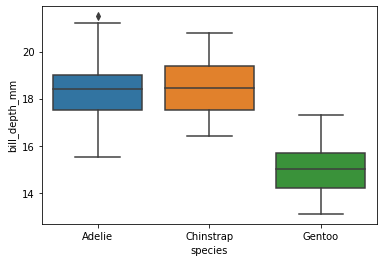

In [6]:
import seaborn as sns

sns.boxplot(data = pingvindata, x = "species", y = "bill_depth_mm")

Vi kan forklare dette plottet slik:

- Den svarte linja midt i boksene er medianen.
- 50 \% av verdiene ligger innenfor boksene. Boksene markerer altså interkvartilområdet, fra $Q_1$ til $Q_3$.
- Vi har to utstikkere på hver side av boksen. De viser $IQR\cdot1.5 = 1.5(Q_3 - Q_1)$ i begge retninger.
- Verdier som ligger utenfor disse utstikkerne, kalles _uteliggere_. Dette er unormalt store eller små verdier. Dette kan si oss noe om vi har mange unormale verdier eller om vi har noen få som vi kanskje kan fjerne ved nærmere statistisk analyse. Vi ser kun én uteligger hos Adelie-pingvinene, med unormalt dypt nebb.

```{admonition} Underveisoppgave
:class: tip
Lag et boksplott over kroppsmasse som funksjon av øya pingvinene er funnet på. Identifiser eventuelle uteliggere.
```

````{admonition} Underveisoppgave
:class: tip, dropdown
```{code-block} Python
sns.boxplot(data = pingvindata, x = "island", y = "body_mass_g")
```
````

Et alternativ til boksplott er fiolinplott. Prinsippet er ganske likt som med boksplott, men det viser i tillegg fordelingen av de ulike verdiene ved å angi "tynne" og "tykke" områder. Medianen markeres med en hvit prikk, og IQR med en tykk, svart linje. Uteliggere markeres ofte ikke i fiolinplott.

<AxesSubplot:xlabel='species', ylabel='bill_depth_mm'>

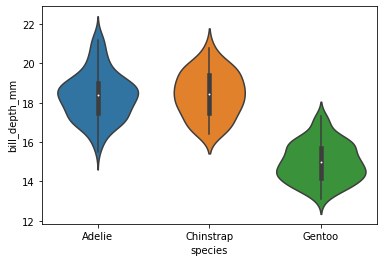

In [7]:
sns.violinplot(data=pingvindata, x='species', y='bill_depth_mm')

## Varians og standardavvik

I motsetning til IQR, som tar utgangspunkt i medianen, tar varians og standardavvik utgangspunkt i gjennomsnittet. Varians ($\sigma^2$) er et mål på variasjonen i et datasett og skrives ofte som $\sigma^2$. Det er definert som den gjennomsnittlige kvadrerte avstanden til gjennomsnittet av variabelen:

$\sigma^2  = \frac{1}{n-1}\sum_{i=1}^n(x_i-\bar{x})^2$

Her er _n_ totalt antall målinger, $x_i$ er hver måleverdi og $\bar{x}$ er gjennomsnittet av alle måleverdier. Egentlig bør vi jo dele på $n$ når vi skal finne gjennomsnittet av denne differansen. Men vi deler på $n - 1$ istedenfor $n$ fordi datasettet vårt inneholder et utvalg måledata fra en tenkt fullstendig populasjon. Når vi deler på $n - 1$ får vi en større varians enn når vi deler på $n$. En forklaring på dette er at dersom vi hadde samlet inn data fra hele populasjonen, eller gjort tusenvis av målinger av den samme parameteren, ville spredningen (variansen) av målingene vært litt mindre sammenliknet med når vi har færre datapunkter. Vi kaller derfor variansen som er definert ovenfor, for _empirisk varians_.

Kort oppsummert gjør vi følgende for å regne ut varians:
1. Finner differansen mellom hver måleverdi/hvert datapunkt og trekker fra gjennomsnittet. Dette gir avstanden mellom et målepukt og den gjennomsnittlige verdien.
2. Kvadrerer differansen for å kun få positive verdier. Om vi ikke hadde gjort dette, ville mange negative og positive verdier utlignet hverandre, slik at for eksempel to ekstreme verdier på hver sin side av gjennomsnittet ville gitt 0 i varians.
3. Summerer alle de kvadrerte differansene og deler på antallet målinger (her antallet målinger minus 1). Dette gir den gjennomsnittlige variansen for hele variabelen.

Siden vi kvadrerer avstanden mellom verdier og gjennomsnittet når vi regner ut varians, blir ofte variansen svært stor dersom det finnes noen verdier som ligger et stykke unna gjennomsnittet. I tillegg får den kvadrerte enheter (som $g^2$ og $mm^2$, og det er vanskelig å sammenlikne den med måledataene. Derfor er det vanligere å bruke _standardavvik_ som et mål på spredning. Det er definert som den posive kvadratrota av variansen:

$\sigma  = \sqrt{\frac{1}{n-1}\sum_{i=1}^n(x_i-\bar{x})^2}$

Vi kan enkelt finne variansen og standardavviket med Pandas. Pandas deler på $n-1$, og ikke $n$, slik som vi også har gjort.

In [29]:
varians = pingvindata["bill_depth_mm"].var()
standardavvik = pingvindata["bill_depth_mm"].std()

```{admonition} Underveisoppgave
Forklar hva varians og standardavvik er. Lag to Python-funksjoner som regner ut henholdsvis gjennomsnitt og standardavvik. Funksjonene skal gi samme svar som _std_- og _mean_-funksjonen i Pandas.
```

## Visualisering av feil
En enkel visualisering av standardavviket når vi gjør flere ulike målinger, er ved hjelp av usikkerhetsstolper. Usikkerhetsstolper kan vi bruke når vi har gjort flere målinger på samme variabel. Vi kan ta som eksempel et eksperiment der vi skal konstruere en standardkurve for magnesiumkonsentrasjonen i en vannprøve. Vi bruker en serie på 0.2, 0.3, 0.4, 0.5 og 0.6 $\mu$g/mL Mg$^{2+}$ som vi analyserer tre ganger hver med et flammeatomabsorpsjonsspektrofotometer (for øvrig et nydelig ord!). Da har vi tre målinger for absorpsjon per konsentrasjon. Nedenfor ser du en måte å gjøre dette på. Vi bruker funksjonen _errorbar_ som tar $x$-verdier, gjennomsnittet og standardavviket som parametre. I tillegg kan vi sette streker på toppen av feilen med _capsize_ i en ønsket størrelse. Hvis vi ikke ønsker strekene mellom datapunktene i plottet ovenfor, kan vi legge inn argumentet _fmt='none'_.

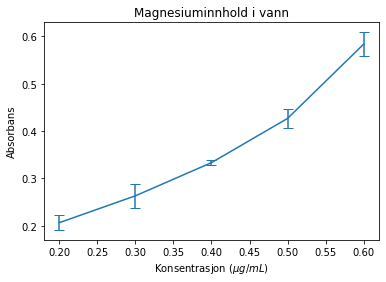

In [92]:
import numpy as np
import matplotlib.pyplot as plt

konsentrasjon = [0.2, 0.3, 0.4, 0.5, 0.6]
absorbans = [[0.21, 0.22, 0.19], [0.26, 0.29, 0.24], [0.33, 0.33, 0.34], [0.41, 0.42, 0.45], [0.56, 0.61, 0.58]]

standardavvik = []
snitt = []

for element in absorbans:
    snitt.append(np.mean(element))
    standardavvik.append(np.std(element,  ddof = 1)) # ddof = 1 betyr at vi deler på n - 1.

plt.errorbar(konsentrasjon, snitt, yerr = standardavvik, capsize=5)
plt.errorbar
plt.xlabel('Konsentrasjon ($\mu g/mL$)')
plt.ylabel('Absorbans')
plt.title('Magnesiuminnhold i vann')
plt.show()

Det finnes også tilsvarende plott i seaborn-biblioteket, som er enklere å bruke dersom vi har dataene som en data frame:

<AxesSubplot:xlabel='species', ylabel='flipper_length_mm'>

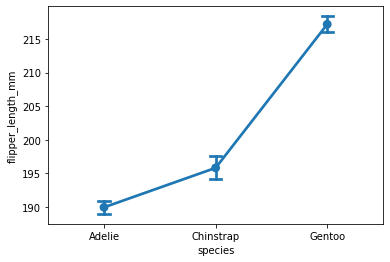

In [97]:
sns.pointplot(data=pingvindata,x="species", y="flipper_length_mm",  capsize=.1)

## Regresjon
Alle måledata er _diskrete verdier_. Det betyr at de er ikke-kontinuerlige, altså at det ikke finnes uendelig mange verdier mellom punktene vi har. Vi representerer diskrete data som punkter dersom vi plotter det, mens kontinuerlige data/funksjoner plotter vi som linjer og kurver. Noen ganger kan vi derimot lage kontinuerlige modeller som representerer de diskrete dataene våre. En slik modell kan beskrive både verdier imellom datapunktene, men også utenfor datasettet vi har samlet. En enkel form for modellering er _regresjon_.

```{admonition} Regresjon
Regresjon er en prosess der vi tilnærmer diskrete data med en kontinuerlig funksjonsmodell. 
```

La oss ta et eksempel der vi har brukt et spektrometer til å måle absorbansen til ulike standardløsninger med permanganationer $MnO_4^{-}$. Vi har gjort dette fordi vi har en løsning med ukjent innhold av permanganationer. Da trenger vi å gjøre en lineær regresjon for å kunne avgjøre hvilken konsentrasjon absorbansen til den ukjente prøva tilsvarer. Programmet nedenfor lager en standardkurve/kalibreringskurve med funksjonen _polyfit_ fra numpy-biblioteket. Denne funksjonen bruker _minste kvadraters metode_ til å tilpasse funksjonsverdier til datapunktene på en måte som gir minst mulig varians.

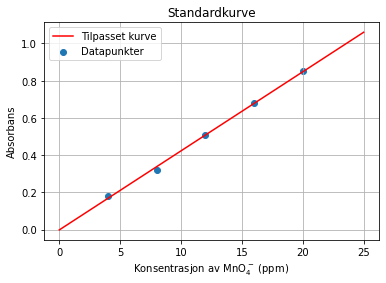

In [1]:
import numpy as np
import matplotlib.pyplot as plt

permanganat = [4.0, 8.0, 12.0, 16.0, 20.0] # konsentrasjon i ppm
absorbans = [0.18, 0.32, 0.51, 0.68, 0.85]

reg = np.polyfit(permanganat, absorbans, 1)  # får koeffisientene a og b i en lineær regresjon (grad 1)
x = np.linspace(0, 25, 1000)                 # nye x-verdier for regresjonslinja
y = np.polyval(reg, x)                       # gir et uttrykk på formen y = ax + b, der x = permanganatkonsentrasjonen

plt.scatter(permanganat,absorbans,label='Datapunkter')
plt.plot(x, y, color = 'red',label='Tilpasset kurve')
plt.legend()
plt.title('Standardkurve')
plt.xlabel('Konsentrasjon av MnO$_4^-$ (ppm)')
plt.ylabel('Absorbans')
plt.grid()

Funksjonen _polyfit_ utfører polynomregresjon på dataene våre, og tar som argument $x$- og $y$-verdiene i datasettet, og deretter graden av polynomet. Her har vi brukt grad 1 for lineær regresjon. Dette gir en array med koeffisientene _a_ og _b_ for uttrykket $y = ax + b$. Tilsvarende vil en andregradsregresjon gi koeffisientene _a_, _b_ og _c_ for $ax^2 + bx + c$ og så videre. Vi kan dermed bruke disse koeffisientene videre til å lage nye $y$-verdier basert på de opprinnelige $x$-verdiene. Til det kan vi bruke funksjonen _polyval_, som tar to parametre: koeffisientene som er gitt av polyfit-funksjonen og de nye _x_-verdiene som vi skal regne ut funksjonsverdier til.

La oss si at den ukjente prøva med permanganationer ga en absorbans på 0.40. Vi kan bruke regresjonskurven vår til å finne hva slags konsentrasjon dette tilsvarer på følgende måte:

Konsentrasjonen til permanganat = 9.5 ppm.


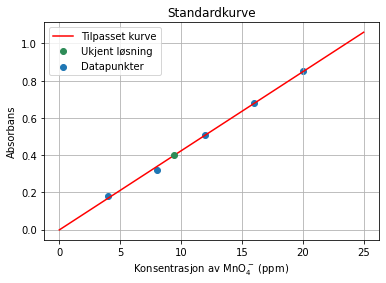

In [2]:
import numpy as np
import matplotlib.pyplot as plt

permanganat = [4.0, 8.0, 12.0, 16.0, 20.0] # konsentrasjon i ppm
absorbans = [0.18, 0.32, 0.51, 0.68, 0.85]
ukjent_abs = 0.40

# Gjør regresjonen
reg = np.polyfit(permanganat, absorbans, 1)  # får koeffisientene a og b i en lineær regresjon (grad 1)
x = np.linspace(0, 25, 1000)                 # nye x-verdier for regresjonslinja
y = np.polyval(reg, x)                       # gir et uttrykk på formen y = ax + b, der x = permanganatkonsentrasjonen

# Regner ut den ukjente konsentrasjonen
ukjent_kons = (ukjent_abs - reg[1])/reg[0]
print("Konsentrasjonen til permanganat =", round(ukjent_kons,1), "ppm.")

plt.scatter(permanganat,absorbans,label='Datapunkter')
plt.plot(x, y, color = 'red',label='Tilpasset kurve')
plt.plot(ukjent_kons, ukjent_abs, linestyle = " ", marker = "o", color = 'seagreen', label = "Ukjent løsning")
plt.legend()
plt.title('Standardkurve')
plt.xlabel('Konsentrasjon av MnO$_4^-$ (ppm)')
plt.ylabel('Absorbans')
plt.grid()

```{admonition} Underveisoppgave
:class: tip
Fritt klor ($Cl_2$) finnes i en del drikkevann fordi klorforbindelser blir tilsatt klorforbindelser for å desinfisere vannet. I programmet nedenfor har vi lagt inn en serie målinger som er gjort på standardløsninger av konsentrasjonen av fritt klor i vann gitt i ppm. Gjør en regresjon av dataene og lag en standardkurve. Regn ut konsentrasjonen av fritt klor i en drikkevannsprøve med absorbans 0.656 ppm.


<iframe src="https://trinket.io/embed/python3/b0fe4c6774" width="100%" height="600" frameborder="0" marginwidth="0" marginheight="0" allowfullscreen></iframe>
```

````{admonition} Løsningsforslag
```{code-block} Python
:class: tip, dropdown
import numpy as np
import matplotlib.pyplot as plt

klor = [0, 0.50, 1.00, 1.50, 2.00] # konsentrasjon i ppm
absorbans = [0.000, 0.270, 0.543, 0.813, 1.084]
ukjent_abs = 0.656

# Gjør regresjonen
reg = np.polyfit(klor, absorbans, 1)  # får koeffisientene a og b i en lineær regresjon (grad 1)
x = np.linspace(0, 2.2, 1000)                 # nye x-verdier for regresjonslinja
y = np.polyval(reg, x)                       # gir et uttrykk på formen y = ax + b, der x = permanganatkonsentrasjonen

# Regner ut den ukjente konsentrasjonen
ukjent_kons = (ukjent_abs - reg[1])/reg[0]
print("Konsentrasjonen til fritt klor =", round(ukjent_kons,2), "ppm.")

plt.scatter(klor,absorbans,label='Datapunkter')
plt.plot(x, y, color = 'red',label='Tilpasset kurve')
plt.plot(ukjent_kons, ukjent_abs, linestyle = " ", marker = "o", color = 'seagreen', label = "Ukjent løsning")
plt.legend()
plt.title('Standardkurve')
plt.xlabel('Konsentrasjon av Cl$_2$ (ppm)')
plt.ylabel('Absorbans')
plt.grid()
plt.show()
```
````

Når vi har utført regresjon, kan vi også forutsi datapunkter som er utenfor datapunktene våre. Dette kaller vi _ekstrapolering_. Ved å ekstrapolere kan vi forutsi hvordan et system _har vært_ eller _kommer til å bli_. En skal derimot være svært forsiktig med å trekke slutninger basert på ekstrapolering! Det kan likevel være en god indikasjon på trender og utviklingen i et system.

Vi kan også lage visualiseringer med automatiske regresjonskurver. La oss vende tilbake til pingvinene våre. For å se om det kan være noen sammenhenger som er verdt å lage en modell av, kan vi enkelt visualisere mange ulike variabler mot hverandre ved å bruke et parplott (_pairplot_) fra seaborn-biblioteket:

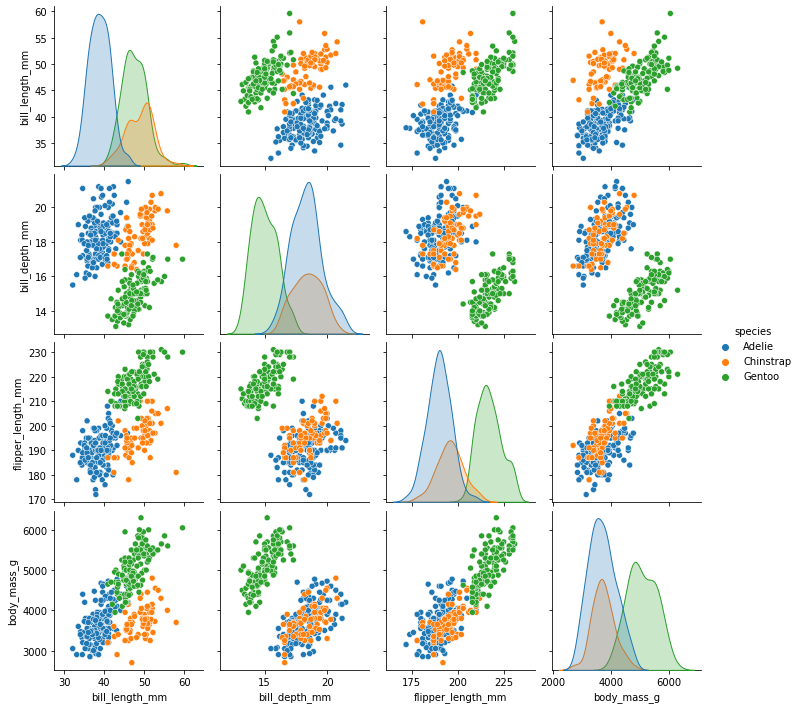

In [35]:
import seaborn as sns

sns.pairplot(data = pingvindata, hue = "species")

```{admonition}
:class: tip
Studer plottet ovenfor. Hva forteller de ulike plottene deg? Hvilke variabler ser det ut som det er en lineær sammenheng mellom?
```

Vi tar utgangspunkt i kroppsmasse og vingelengde, som ser ut til å være lineært avhengig av hverandre. Et plott med regresjonslinje kan vi lage ved å bruke funksjonen _lmplot_ (eller _regplot_) fra seaborn-biblioteket:

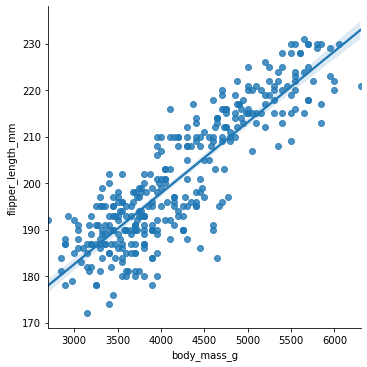

In [58]:
sns.lmplot(data = pingvindata, x = "body_mass_g", y = "flipper_length_mm")

Vi ser at vi får en regresjonslinje med et svakt blått område på hver side av linja. Dette området indikerer usikkerheten i verdiene. Desto større dette området er, desto mer usikkert er det at regresjonslinja er en god modell i dette området. Vi kan gjøre dette tydeligere ved å velge to variabler som ikke varierer så godt lineært:

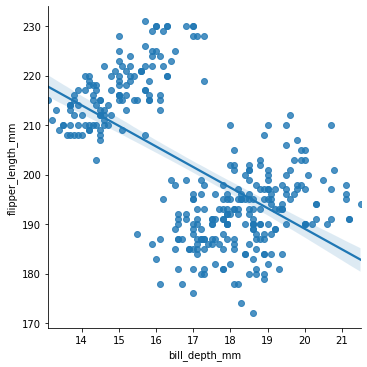

In [59]:
sns.lmplot(data = pingvindata, x = "bill_depth_mm", y = "flipper_length_mm")

Vi kan også gjøre regresjon på ulike variabler, slik som ulike arter, for seg:

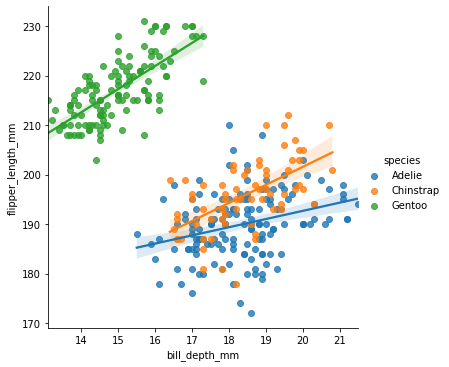

In [61]:
sns.lmplot(data = pingvindata, x = "bill_depth_mm", y = "flipper_length_mm", hue = "species")

## Korrelasjon
Korrelasjoner kan brukes til å analysere sammenhenger mellom parametre.  Korrelasjon beregnes som en verdi mellom -1 og 1. En verdi som brukes ofte som mål på korrelasjon, er _Pearsons korrelasjonskoeffisient_. Positiv korrelasjon betyr at det er en proporsjonal sammenheng mellom parametrene, og en negativ korrelasjon betyr at det er en omvendt proporsjonal sammenheng. Desto større absoluttverdien til korrelasjonen er, desto større sammenheng er det mellom parametrene. Vi kan visualisere korrelasjon gjennom et korrelasjonsplott:

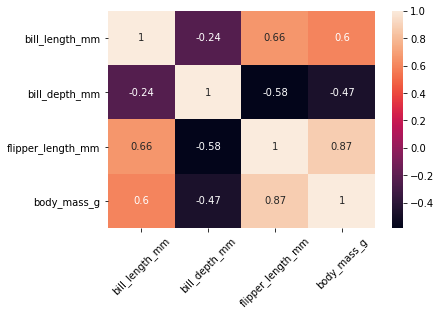

In [99]:
corr = pingvindata.corr()     # Regner ut korrelasjonskoeffisientene
sns.heatmap(corr, annot=True) # Lager visualisering. Parameteren annot = True gir tallene i boksene.
plt.xticks(rotation=45)       # Roterer x-akseteksten 45 grader
plt.show()

In [108]:
pingvindata.corr()

bill_length_mm  bill_depth_mm  flipper_length_mm  \
bill_length_mm           1.000000      -0.235053           0.656181   
bill_depth_mm           -0.235053       1.000000          -0.583851   
flipper_length_mm        0.656181      -0.583851           1.000000   
body_mass_g              0.595110      -0.471916           0.871202   

                   body_mass_g  
bill_length_mm        0.595110  
bill_depth_mm        -0.471916  
flipper_length_mm     0.871202  
body_mass_g           1.000000

Vi ser for eksempel at det er ganske stor positiv korrelasjon mellom nebblengde og lengden på vingene (luffene). Det betyr at dersom en pingvin har langt nebb, har den ofte også lange vinger. Det er derimot negativ korrelasjon mellom nebbdybde og vingelengde, som betyr at desto dypere nebb, desto kortere vinger har pingvinen.

Det er derimot viktig å ikke blande korrelasjon med årsak-virkning (kausalitet). Den ene tingen forklarer ikke nødvendigvis den andre (selv om det kan gjøre det), det er bare en sammenheng mellom parametrene.

```{admonition} Underveisoppgave
:class: tip
I programmet nedenfor finner du datasettet "iris.txt". Les inn datasettet og gjør en korrelasjonsanalyse av variablene. Hvilke faktorerer korrelerer positivt og negativt med hverandre? Finnes det logiske forklaringer på det?

<iframe src="https://trinket.io/embed/python3/1818f7d4b2" width="100%" height="300" frameborder="0" marginwidth="0" marginheight="0" allowfullscreen></iframe>
```

````{admonition} Løsningsforslag
:class: tip, dropdown
```{code-block}
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

iris = pd.read_csv("iris.txt")
corr = iris.corr()

sns.heatmap(corr, annot=True,)
plt.xticks(rotation=45)  
plt.show()
```
````

I videoene nedenfor kan du få en innføring eller repetisjon i den grunnleggende teorien bak deskriptiv statistikk og regresjonsanalyse:

````{tab-set} 
```{tab-item}Regresjon
<iframe width="800" height="600" src="https://www.youtube.com/embed/l7aAcyzA4VE? autoplay=0&rel=0" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>
```
````